In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from IPython.display import display, Math, Latex

# Daltonisme bayésien

Environ 8% des hommes et 0.5% des femmes sont, à des degrés divers, daltoniens.

## Question 1

De cette simple information, calculer le pourcentage de femmes parmi les daltoniens (en ajoutant une hypothèse a priori que vous préciserez sur la distribution hommes/femmes)

On rappelle que : 

$$P(A,B)=P(B|A)\cdot P(A)=P(A|B)\cdot P(B)$$
$$P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B)}$$

In [2]:
genre=gum.LabelizedVariable("G","Gender",["H","F"])
dalton=gum.LabelizedVariable("D","Daltonism",0).addLabel("O").addLabel("N")
dalton

(pyAgrum.LabelizedVariable@000002777FEAF900) D:Labelized({O|N})

In [3]:
pG=gum.Potential().add(genre).fillWith([0.48,0.52])
gnb.showPotential(pG)

In [4]:
pDsiG=gum.Potential().add(dalton).add(genre).fillWith([8/100,92/100,0.5/100,99.5/100])
gnb.showPotential(pDsiG)
gnb.showPotential(pG)

In [5]:
pDetG=pDsiG*pG
gnb.showPotential(pDetG)

In [6]:
pD=pDetG.margSumOut(["G"])
gnb.showPotential(pD)

In [7]:
pGsiD=pDetG/pD
gnb.showPotential(pGsiD)

In [8]:
display(Math(r"$P(D|G)$"))
pDsiG=gum.Potential().add(dalton).add(genre).fillWith([8/100,92/100,0.5/100,99.5/100])
gnb.showPotential(pDsiG)

pG=gum.Potential().add(genre).fillWith([0.48,0.52])
display(Math(r"$P(G)$"))
gnb.showPotential(pG)

pDetG=pDsiG*pG
display(Math(r"$P(G,D)=P(D|G)\cdot P(G)$"))
gnb.showPotential(pDetG)

pD=pDetG.margSumOut(["G"])
display(Math(r"$P(D)=\sum_G P(G,D)$"))
gnb.showPotential(pD)

display(Math(r"$P(G|D)=\frac{P(G,D)}{p(D)}"))
pGsiD=pDetG/pD
gnb.showPotential(pGsiD)

print("Il y a {:4.2f}% de femmes parmi les daltoniens".format(100*pGsiD[{"D":"O","G":"F"}]))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Il y a 6.34% de femmes parmi les daltoniens


## Question 2

Construire le réseau bayésien qui représente ce problème et vérifier cette valeur par propagation (inférence).

Indice : le réseau bayésien contiendra deux variables binaires, une liée à la population (homme ou femme), une liée au daltonisme (présent ou non).

In [9]:
bn=gum.BayesNet()

g=bn.add(genre)
d=bn.add(dalton)

bn.addArc(g,d)

# ou alors en une seule ligne
bn=gum.fastBN("G{H|F}->D{O|N}")
bn

(pyAgrum.BayesNet<double>@000002770F429800) BN{nodes: 2, arcs: 1, domainSize: 4, dim: 3, mem: 48o}

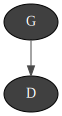

(pyAgrum.Potential<double>@000002770F011C90) 
      ||  D                |
G     ||O        |N        |
------||---------|---------|
H     || 0.0800  | 0.9200  |
F     || 0.0050  | 0.9950  |

In [10]:
bn.cpt("G").fillWith(pG[:])

bn.cpt("D")[{'G':'H'}]=[0.08,0.92]
bn.cpt("D")[{'G':'F'}]=[0.005,0.995]

gnb.showBN(bn)
bn.cpt("D")

Il suffit de faire une inférence de l'information $D=0$ (Daltonien=oui)

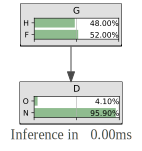

In [11]:
#gnb.showPosterior(bn,target='G',evs={'D':0})
gnb.showInference(bn)

# Question 2 (bis)

Une autre façon de faire le calcul : renverser l'arc pour obtenir un BN qui contient $P(D)$

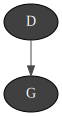

In [12]:
bn.reverseArc(g,d)
gnb.showBN(bn)

In [13]:
gnb.showPotential(bn.cpt(g))
gnb.showPotential(bn.cpt("D"))

On retrouve bien $P(G=F|D=O)=0.0634$

Exemple : Si l'a priori dit que la probabilité d'être une femme est de 52%, la valeur calculée attendue est de 6.34%